In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Relação entre suicidios e empregabilidade no Brasil

#### Importando o dataset

In [32]:
##https://www.kaggle.com/datasets/ronaldonyango/global-suicide-rates-1990-to-2022?rvi=1

suicide_ages = pd.read_csv('data/age_suicide_rates.csv', sep = ',')
suicide_ages.head(10)

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,33,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Female,14,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993,Male,46,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993,Female,27,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994,Male,37,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086
5,EU,Europe,ALB,Albania,1994,Female,15,0.243427,0.988147,0.928333,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086
6,EU,Europe,ALB,Albania,1995,Male,57,0.612113,3.659538,3.545217,3187784.0,2.392765e+09,750.604449,2.035220e+09,2710.0,7.793219,53.186
7,EU,Europe,ALB,Albania,1995,Female,34,0.503928,2.113380,2.071781,3187784.0,2.392765e+09,750.604449,2.035220e+09,2710.0,7.793219,53.186
8,EU,Europe,ALB,Albania,1996,Male,53,0.539825,3.656300,3.263547,3168033.0,3.199641e+09,1009.977111,2.823912e+09,3050.0,12.725478,53.039
9,EU,Europe,ALB,Albania,1996,Female,39,0.562852,2.431447,2.350814,3168033.0,3.199641e+09,1009.977111,2.823912e+09,3050.0,12.725478,53.039


#### Filtrando os dados do Brasil

In [33]:
brasil_suicides = suicide_ages[suicide_ages['CountryCode'] == 'BRA']
brasil_suicides.head(10)

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
674,CSA,Central and South America,BRA,Brazil,1991,Male,3980,0.838062,6.524214,5.280680,153336445.0,4.070000e+11,2656.497207,4.350000e+11,6640.0,432.786662,59.651
675,CSA,Central and South America,BRA,Brazil,1991,Female,1202,0.367150,1.813565,1.575796,153336445.0,4.070000e+11,2656.497207,4.350000e+11,6640.0,432.786662,59.651
676,CSA,Central and South America,BRA,Brazil,1992,Male,4074,0.835228,6.426988,5.315588,155900790.0,3.910000e+11,2505.377758,4.290000e+11,6670.0,951.962053,59.646
677,CSA,Central and South America,BRA,Brazil,1992,Female,1178,0.349069,1.708077,1.517711,155900790.0,3.910000e+11,2505.377758,4.290000e+11,6670.0,951.962053,59.646
678,CSA,Central and South America,BRA,Brazil,1993,Male,4354,0.843432,6.590081,5.588959,158440875.0,4.380000e+11,2766.345596,4.310000e+11,7010.0,1927.380790,59.997
679,CSA,Central and South America,BRA,Brazil,1993,Female,1193,0.331462,1.669538,1.511169,158440875.0,4.380000e+11,2766.345596,4.310000e+11,7010.0,1927.380790,59.997
680,CSA,Central and South America,BRA,Brazil,1994,Male,4632,0.890826,6.915531,5.851461,160980472.0,5.460000e+11,3393.142926,4.770000e+11,7350.0,2075.888398,59.749
681,CSA,Central and South America,BRA,Brazil,1994,Female,1299,0.355976,1.753785,1.618228,160980472.0,5.460000e+11,3393.142926,4.770000e+11,7350.0,2075.888398,59.749
682,CSA,Central and South America,BRA,Brazil,1995,Male,5174,0.992271,7.500941,6.434094,163515328.0,7.690000e+11,4704.959837,6.050000e+11,7900.0,66.007034,59.521
683,CSA,Central and South America,BRA,Brazil,1995,Female,1410,0.382292,1.888961,1.727845,163515328.0,7.690000e+11,4704.959837,6.050000e+11,7900.0,66.007034,59.521


In [34]:
## Contando o número total de suicidios no Brasil desde 1990
total_brasil_suicides = brasil_suicides['SuicideCount'].sum()
print(total_brasil_suicides)


269397


#### Selecionando apenas as colunas desejadas e indexando novamente.

In [35]:
dados = brasil_suicides[['Year', 'SuicideCount', 'Sex', 'EmploymentPopulationRatio', 'InflationRate']]
dados.index = range(dados.shape[0])
dados

,Year,SuicideCount,Sex,EmploymentPopulationRatio,InflationRate
0,1991,3980,Male,59.651,432.786662
1,1991,1202,Female,59.651,432.786662
2,1992,4074,Male,59.646,951.962053
3,1992,1178,Female,59.646,951.962053
4,1993,4354,Male,59.997,1927.380790
...,...,...,...,...,...
76,2020,10872,Male,52.030,3.211768
77,2020,2966,Female,52.030,3.211768
78,2020,3,Unknown,52.030,3.211768
79,1990,3618,Male,NaN,NaN


#### Removendo os dados de 1990

In [36]:
dados = dados.drop(dados.tail(2).index)

#### Separando DataFrames por Sexo

In [37]:
dados_male = dados[dados['Sex'] == 'Male']
dados_female = dados[dados['Sex'] == 'Female']
dados_unknown = dados[dados['Sex'] == 'Unknown']


## Visualizando com Matplotlib

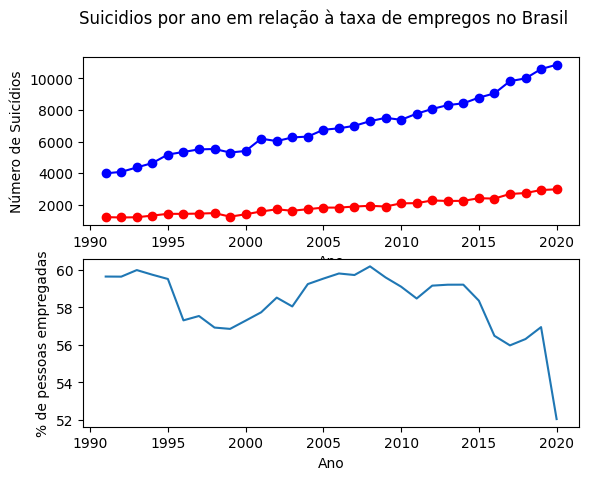

In [38]:
x = dados_male['Year']
y = dados_male['SuicideCount']
line = dados_male['EmploymentPopulationRatio']
line2 = dados_male['InflationRate']

x2 = dados_female['Year']
y2 = dados_female['SuicideCount']
r = dados_female['EmploymentPopulationRatio']

fig, axs = plt.subplots(2)
fig.suptitle('Suicidios por ano em relação à taxa de empregos no Brasil')
axs[0].plot(x, y, 'o-b')
axs[0].plot(x2, y2, 'o-r')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de Suicídios')

axs[1].set_xlabel('Ano')
axs[1].set_ylabel('% de pessoas empregadas')
axs[1].plot(x, line, '-')
plt.show()
